<a href="https://colab.research.google.com/github/yunseo4401/start/blob/master/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80%EC%9D%B4%EC%A4%91%EB%B6%84%EB%A5%98%2B_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body=pd.read_csv('/content/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
body.info() #클래스를 종속변수로 해야겠다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [4]:
body['class'].value_counts() #이진분류 모델에서는 A이면 1,A가 아니면 0이 되도록 구현해야겠다 

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [5]:
body['gender']=np.where(body['gender']=='M',0,1)
body['class_1']=np.where(body['class']=='A',1,0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [6]:
from sklearn.model_selection import train_test_split
feature_columns=list(body.columns.difference(['class','class_1']))
x=body[feature_columns]
y=body['class_1']

train_input,test_input,train_target,test_target=train_test_split(x,y,stratify=y,train_size=0.7,random_state=1)
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(9375, 11) (9375,)
(4018, 11) (4018,)


In [7]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()
logR.fit(train_input,train_target)

LogisticRegression()

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

pred=logR.predict(test_input)
test_cm=confusion_matrix(test_target,pred)
test_acc=accuracy_score(test_target,pred)
test_prc=precision_score(test_target,pred)
test_rcll=recall_score(test_target,pred)
test_f1=f1_score(test_target,pred)

print(test_cm)
print(test_acc)
print(test_prc)
print(test_rcll)
print(test_f1)

[[2759  255]
 [ 345  659]]
0.8506719761075162
0.7210065645514223
0.6563745019920318
0.6871741397288843


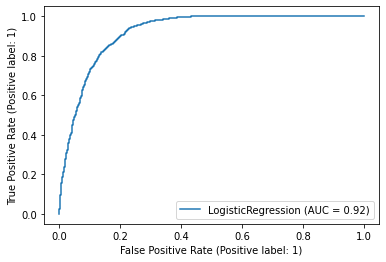

In [9]:
#ROC커브와 AUC를 시각화해보자 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logR,test_input,test_target)
plt.show()

In [10]:
#이중분류를 하기 위해 데이터프레임을 약간 바꾸어보자 
#원래 클래스의 종류가 A,B,C,D이므로 4중분류 
mapping={'A':0,'B':1,'C':2,'D':3}
body['class_2']=body['class'].map(mapping)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0,3


In [11]:

teature_columns=list(body.columns.difference(['class','class_2','class_1']))
x=body[feature_columns]
y=body['class_2']

train_input,test_input,train_target,test_target=train_test_split(x,y,stratify=y,train_size=0.7,random_state=1)
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(9375, 11) (9375,)
(4018, 11) (4018,)


In [17]:
softm=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softm.fit(train_input,train_target)

print(softm.score(train_input,train_target))
print(softm.score(test_input,test_target))
pred=softm.predict(test_input)

test_cm=confusion_matrix(test_target,pred)
test_acc=accuracy_score(test_target,pred)

print(test_cm)
print(test_acc)

0.60384
0.5990542558486809
[[707 261  36   0]
 [269 403 299  33]
 [ 92 207 525 181]
 [ 13  63 157 772]]
0.5990542558486809


In [18]:
print(softm.predict(test_input[:4])) #테스트 세트의 처음 4개의 샘플에 대한 예측 출력 
print(softm.predict_proba(test_input[:4]))  #테스트 세트의 처음 4개 샘플에 대한 예측 확률 

[1 0 3 2]
[[0.2540153  0.47223628 0.2425272  0.03122122]
 [0.44246496 0.34597953 0.20099154 0.01056396]
 [0.01516536 0.12099648 0.3198851  0.54395306]
 [0.03988404 0.22933716 0.4749264  0.2558524 ]]


In [19]:
print(softm.coef_.shape,softm.intercept_.shape) #11개의 특성을 사용하므로 11열 

(4, 11) (4,)
